# seaborn: statistical data visualization

Hi guys,<br>
Welcome back to the seaborn: a statistical data visualization section. We are going to talk about Matrix plots in this lecture. <br>

## Matrix Plots

Seaborn's matrix plots, such as, `"heatmap()"` allow us to plot the data as color-encoded matrices, whereas `"clustermap()"`can be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's learn with examples:

In [1]:
# Importing required libraries and loading dataets
import seaborn as sns
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [2]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
# flights dataset is tells the no. of passengers flew in a month of some year.
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


### `heatmap()`
* `heatmap()` actually plot rectangular data as a color-encoded matrix and is a primary way of showing matrix plot.
* In order for a `heatmap()` to work properly, our data should already be in a matrix form, the `sns.heatmap` function basically just colors it in for us. 
* The matrix form of the data mean the `index name` and the `column name` match up so that the cell value actually indicates something that us relevant to both of those names.  <br>

For instance, if we take a look at our `"tips"` data frame, we have a column `total_bill` which is some sort of a label, if we look at one of its value, say 16.99 at first place. The row is not actually the variable.<br>
In order to get it into a variable form, we need to have both variables on the columns and rows. We can do this usually through a `pivot table`, or trying to get `correlation` data.  <br> 

Let's try for the correlation data first:

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


using `tips.corr()` we get a matrix form of our data with correlation between the columns and indexes.

In [5]:
tips2 = tips[['total_bill', 'tip', 'size']]
tips2

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [7]:
# Matrix form for correlation data
tc = tips2.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


We simply need to call `heatmap()` on our correlated data, which will color scale with gradient for our data. 

<Axes: >

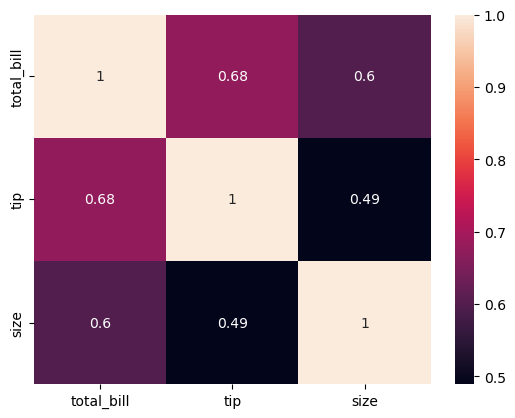

In [9]:
sns.heatmap(tc, annot=True)

We can change the cmap `cmap='coolwarm'`. The `annot=True` write the data value in each cell on the map!

<Axes: >

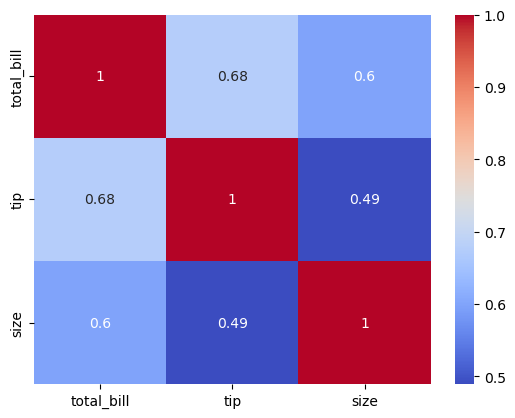

In [10]:
sns.heatmap(tc,cmap='coolwarm',annot=True ) # cmap='Oranges'

**Let's look at the flights data:** We need to create a pivot table first. <br> Let's take no of passengers as "value", "month" as index and "year" as column. 

In [11]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [12]:
pvf = flights.pivot_table(values='passengers',
                                index='month',columns='year')
pvf

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

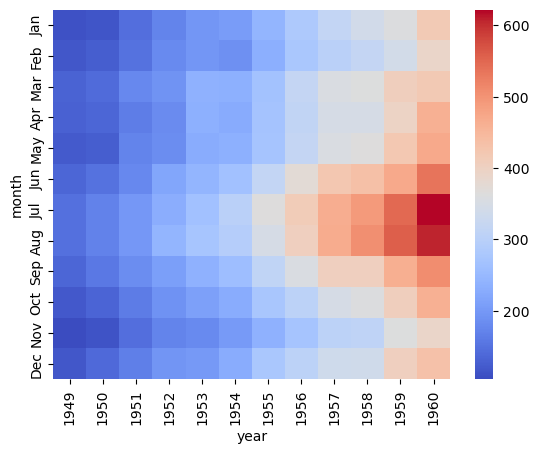

In [18]:
# passing pvflights to the heatmap
sns.heatmap(pvf, cmap='coolwarm')

We can chose: <br>
    * cmap = 'magma' -- using different color map of our choice
    * linecoler = 'white' -- to add line between each cell
    * linewidth = 1 -- how thik the line should be

Let's see how the map look like now!

In [ ]:
sns.heatmap(pvf,cmap='magma',linecolor='white',linewidths=1)
# Annotate each cell with the numeric value using integer formatting:
#sns.heatmap(pvflights,cmap='magma',
#            linecolor='white',linewidths=1, annot=True, fmt="d")

We see the map looks much better now. <br>
* We see that the overall no of passengers increases as we move from 1949 to 1960. This make sense because more people used airplanes with time and more flights were available <br>
* We can also observe that the popular months for travel are usually summer months, Jule, July and August! 

In [19]:
import pandas as pd
data_dic = {'A':[12,15,45,71],
            'B':[18,26,50,80],
            'C':[32,48,78,93],
            'D':[29,35,63,81]}
Heat_df = pd.DataFrame(data_dic) # dataframe from a dic.

In [20]:
Heat_df

,A,B,C,D
0,12,18,32,29
1,15,26,48,35
2,45,50,78,63
3,71,80,93,81


<Axes: >

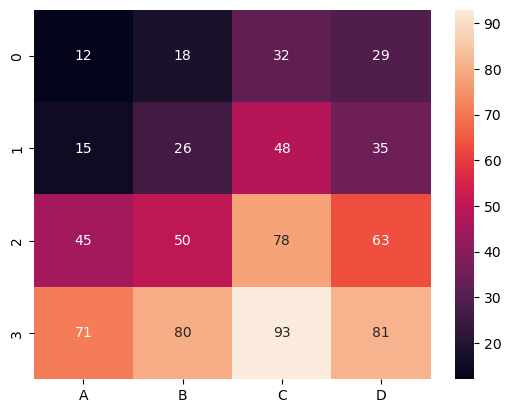

In [21]:
sns.heatmap(Heat_df, annot=True)

In [ ]:
import matplotlib.pyplot as plt

# declaring data
data = [44, 45, 40, 41, 39]
keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

## Excellent work!